### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression

### Loading the dataset

In [2]:
admission_dataset = pd.read_csv("Admission_Predict.csv")
admission_dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
admission_dataset.shape

(400, 9)

In [4]:
admission_dataset.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
admission_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
admission_dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
admission_dataset_copy = admission_dataset.copy()

In [9]:
admission_dataset_copy = admission_dataset_copy.rename(columns={'GRE Score': 'GRE Score', 
                                                                'TOEFL Score': 'TOEFL Score', 
                                                                'LOR ': 'LOR', 
                                                                'Chance of Admit ': 'Admit Possibilty'})

In [10]:
admission_dataset_copy

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


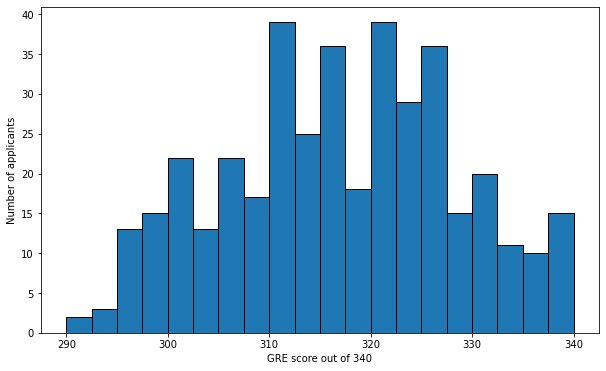

In [11]:
plt.figure(figsize=(10,6))
plt.hist(admission_dataset_copy["GRE Score"], bins=20, ec ='black')
plt.xlabel('GRE score out of 340')
plt.ylabel('Number of applicants')
plt.show()

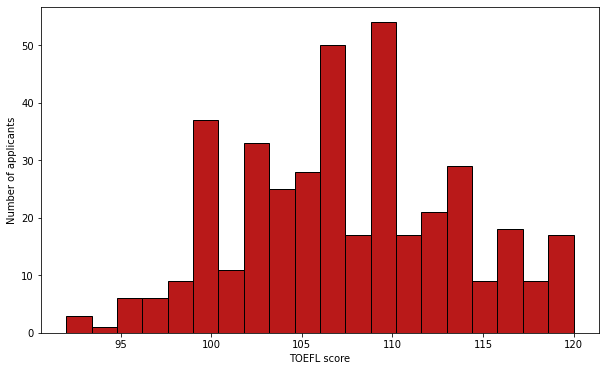

In [12]:
plt.figure(figsize=(10,6))
plt.hist(admission_dataset_copy["TOEFL Score"], bins=20, ec ='black', color = "#b91919")
plt.xlabel('TOEFL score')
plt.ylabel('Number of applicants')
plt.show()

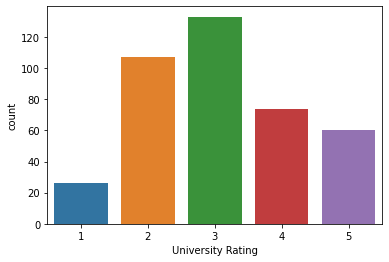

In [13]:
sns.countplot(data = admission_dataset_copy, x = "University Rating")
plt.show()

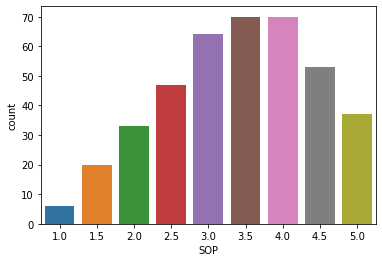

In [14]:
sns.countplot(data = admission_dataset_copy, x = "SOP")
plt.show()

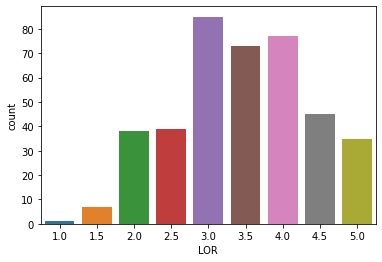

In [15]:
sns.countplot(data = admission_dataset_copy, x = "LOR")
plt.show()

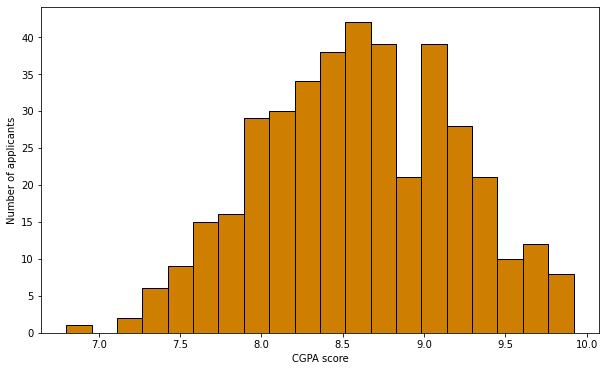

In [16]:
plt.figure(figsize=(10,6))
plt.hist(admission_dataset_copy["CGPA"], bins=20, ec ='black', color = "#ce7e00")
plt.xlabel('CGPA score')
plt.ylabel('Number of applicants')
plt.show()

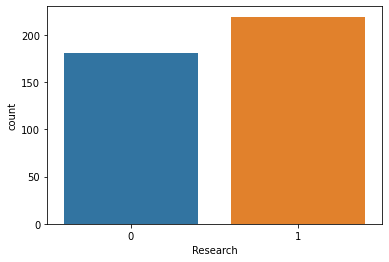

In [17]:
sns.countplot(data = admission_dataset_copy, x = "Research")
plt.show()

In [18]:
corr = admission_dataset_copy.corr()
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Admit Possibilty,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

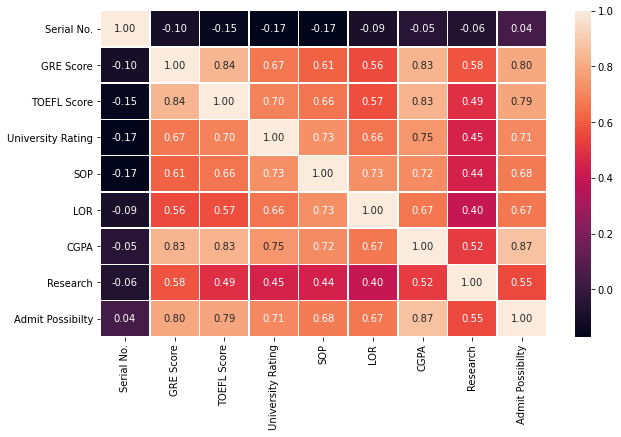

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.5)

In [20]:
corr['Admit Possibilty'].sort_values(ascending = False)

Admit Possibilty     1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Admit Possibilty, dtype: float64

<strong>Clearly, CGPA and GRE Score have a high correlation with the Admission Possibility</strong>

### Data Preprocessing

In [21]:
for col in admission_dataset.columns:
    print(col)
    print(admission_dataset[col].unique())
    print("-"*50)

Serial No.
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244

In [22]:
admission_dataset_copy.drop(["Serial No."], axis = 1, inplace = True)

In [23]:
admission_dataset_copy

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


### Separating Dependent and Independent Variables

In [24]:
X = admission_dataset_copy.drop(["Admit Possibilty"], axis = 1)
y = admission_dataset_copy["Admit Possibilty"]

In [25]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [26]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Admit Possibilty, Length: 400, dtype: float64

### Choosing the best model with PyCaret

In [27]:
from pycaret.regression import *
regressor = setup(data = admission_dataset_copy, target='Admit Possibilty')

,Description,Value
0,session_id,704
1,Target,Admit Possibilty
2,Original Data,"(400, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(279, 11)"


In [28]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.0467,0.0042,0.0643,0.7816,0.0398,0.0758,0.0050
lr,Linear Regression,0.0468,0.0042,0.0644,0.7812,0.0398,0.0758,0.7530
lar,Least Angle Regression,0.0468,0.0042,0.0644,0.7812,0.0398,0.0758,0.0070
br,Bayesian Ridge,0.0466,0.0043,0.0644,0.7811,0.0399,0.0759,0.0060
omp,Orthogonal Matching Pursuit,0.0507,0.0047,0.0679,0.7566,0.0417,0.0805,0.0070
et,Extra Trees Regressor,0.0502,0.0051,0.0702,0.7415,0.0434,0.0817,0.0640
lightgbm,Light Gradient Boosting Machine,0.0496,0.0052,0.0707,0.7386,0.0435,0.0804,0.2150
rf,Random Forest Regressor,0.0517,0.0054,0.0719,0.7300,0.0443,0.0832,0.0720
huber,Huber Regressor,0.0494,0.0053,0.0721,0.7283,0.0449,0.0834,0.0130
gbr,Gradient Boosting Regressor,0.0523,0.0058,0.0747,0.7086,0.0463,0.0860,0.0160


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=704, solver='auto', tol=0.001)

### Spliting the dataset into training and testing dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Training the model

In [30]:
model = BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [31]:
model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

### Making predictions

In [32]:
y_pred = model.predict(X_test)

### Evaluating the model

In [33]:
from sklearn import metrics
import numpy as np
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.04639654888786227
MSE:  0.004331183556664956
RMSE:  0.06581172810878738


In [34]:
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print([accuracy_train, accuracy_test])

[0.8216840037725914, 0.7483372807663086]


<strong>The test accuracy is 74.83%</strong>

### Balancing the label using SMOGN

In [35]:
import smogn

In [36]:
dataset_smogn = smogn.smoter(data = admission_dataset_copy, y = 'Admit Possibilty', samp_method='extreme')

r_index: 100%|##########################################################################| 9/9 [00:00<00:00, 610.80it/s]


In [37]:
dataset_smogn

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000
5,330,115,5,4.500000,3.000000,9.340000,1,0.900000
...,...,...,...,...,...,...,...,...
298,297,96,2,2.383873,2.000000,7.479934,0,0.417273
299,309,101,2,2.543195,2.543195,8.191361,0,0.448000
300,307,107,2,3.576373,3.500000,7.784725,0,0.770000
301,311,99,1,1.098287,1.598287,7.870432,0,0.800000


In [38]:
dataset_smogn.shape

(668, 8)

In [39]:
X = dataset_smogn.drop(["Admit Possibilty"], axis = 1)
y = dataset_smogn["Admit Possibilty"]

In [40]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.500000,4.500000,9.650000,1
1,324,107,4,4.000000,4.500000,8.870000,1
3,322,110,3,3.500000,2.500000,8.670000,1
4,314,103,2,2.000000,3.000000,8.210000,0
5,330,115,5,4.500000,3.000000,9.340000,1
...,...,...,...,...,...,...,...
298,297,96,2,2.383873,2.000000,7.479934,0
299,309,101,2,2.543195,2.543195,8.191361,0
300,307,107,2,3.576373,3.500000,7.784725,0
301,311,99,1,1.098287,1.598287,7.870432,0


In [41]:
y

0      0.920000
1      0.760000
3      0.800000
4      0.650000
5      0.900000
         ...   
298    0.417273
299    0.448000
300    0.770000
301    0.800000
302    0.463656
Name: Admit Possibilty, Length: 668, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [43]:
X_train.shape

(467, 7)

In [44]:
model = BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [45]:
model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn import metrics
import numpy as np
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.06587051774247901
MSE:  0.0072264974419755865
RMSE:  0.08500880802584863


In [48]:
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print([accuracy_train, accuracy_test])

[0.7666925370156386, 0.7285829864243549]


<strong>The test accuracy is 76.86%</strong>

### Choosing a better model

In [49]:
from pycaret.regression import *
regressor = setup(data = dataset_smogn, target='Admit Possibilty')

,Description,Value
0,session_id,4716
1,Target,Admit Possibilty
2,Original Data,"(668, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(467, 12)"


In [50]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0470,0.0050,0.0689,0.8129,0.0431,0.0815,0.0750
lightgbm,Light Gradient Boosting Machine,0.0505,0.0052,0.0703,0.8027,0.0440,0.0882,0.0120
rf,Random Forest Regressor,0.0499,0.0054,0.0718,0.7966,0.0448,0.0861,0.0950
gbr,Gradient Boosting Regressor,0.0526,0.0058,0.0749,0.7818,0.0470,0.0932,0.0210
ridge,Ridge Regression,0.0641,0.0073,0.0843,0.7262,0.0536,0.1161,0.0060
br,Bayesian Ridge,0.0643,0.0073,0.0843,0.7261,0.0536,0.1166,0.0090
lr,Linear Regression,0.0641,0.0073,0.0843,0.7260,0.0536,0.1159,0.0060
lar,Least Angle Regression,0.0640,0.0073,0.0843,0.7260,0.0536,0.1159,0.0110
knn,K Neighbors Regressor,0.0625,0.0077,0.0859,0.7083,0.0536,0.1056,0.0100
huber,Huber Regressor,0.0645,0.0080,0.0877,0.7024,0.0557,0.1148,0.0180


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4716, verbose=0, warm_start=False)

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [52]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn import metrics
import numpy as np
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.048509751747936446
MSE:  0.0048910069693896534
RMSE:  0.06993573456674101


In [55]:
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print([accuracy_train, accuracy_test])

[0.9777178940128417, 0.8163007022878718]


<strong>The test accuracy is 83.45%</strong>

### Saving the model

In [56]:
import pickle as pkl
filename = "model.pkl"  

with open(filename, 'wb') as file:  
    pkl.dump(model, file)